In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.misc.paths as path

%matplotlib inline

import src.vector_gen.generateWeatherVectors as gwv

training_files = "../../dataset/training/"
trajectories_file = "trajectories(table 5)_training.csv"
trajectories_df = pd.read_csv(training_files+trajectories_file)

# prepare data

In [2]:
import src.vector_gen.generateWeatherVectors as gwv

x, y = gwv.generate_timeInformationVectors(trajectories_df)

x_df = gwv.generate_timeInformationVectorX_df(trajectories_df, True)# using arrays -.-
#x_df =  pd.DataFrame(np.reshape(x,(len(x)/3,3)), columns=['dayofweek', 'hour', 'minute'])



y_df = pd.DataFrame(y, columns=['avg_travel_time'])


In [3]:
x

array([ 1,  0,  0, ...,  0, 21, 40], dtype=int64)

In [4]:
x_df['date'] = x_df['datetime'].dt.date
x_df = x_df.set_index(['date','hour','minute'])
x_df

datetime  dayofweek
date       hour minute                               
2016-07-19 0    0      2016-07-19 00:00:00          1
                20     2016-07-19 00:20:00          1
                40     2016-07-19 00:40:00          1
           1    0      2016-07-19 01:00:00          1
                20     2016-07-19 01:20:00          1
                40     2016-07-19 01:40:00          1
           2    0      2016-07-19 02:00:00          1
                20     2016-07-19 02:20:00          1
                40     2016-07-19 02:40:00          1
           3    0      2016-07-19 03:00:00          1
                20     2016-07-19 03:20:00          1
                40     2016-07-19 03:40:00          1
           4    0      2016-07-19 04:00:00          1
                20     2016-07-19 04:20:00          1
                40     2016-07-19 04:40:00          1
           5    0      2016-07-19 05:00:00          1
                20     2016-07-19 05:20:00          1
                40     2016-07-19 05:40:00          1
           6    0      2016-07-19 06:00:00          1
                20     2016-07-19 06:20:00          1
                40     2016-07-19 06:40:00          1
           7    0      2016-07-19 07:00:00          1
                20     2016-07-19 07:20:00          1
                40     2016-07-19 07:40:00          1
           8    0      2016-07-19 08:00:00          1
                20     2016-07-19 08:20:00          1
                40     2016-07-19 08:40:00          1
           9    0      2016-07-19 09:00:00          1
                20     2016-07-19 09:20:00          1
                40     2016-07-19 09:40:00          1
...                                    ...        ...
2016-10-17 12   0      2016-10-17 12:00:00          0
                20     2016-10-17 12:20:00          0
                40     2016-10-17 12:40:00          0
           13   0      2016-10-17 13:00:00          0
                20     2016-10-17 13:20:00          0
                40     2016-10-17 13:40:00          0
           14   0      2016-10-17 14:00:00          0
                20     2016-10-17 14:20:00          0
                40     2016-10-17 14:40:00          0
           15   0      2016-10-17 15:00:00          0
                20     2016-10-17 15:20:00          0
                40     2016-10-17 15:40:00          0
           16   0      2016-10-17 16:00:00          0
                20     2016-10-17 16:20:00          0
                40     2016-10-17 16:40:00          0
           17   0      2016-10-17 17:00:00          0
                20     2016-10-17 17:20:00          0
                40     2016-10-17 17:40:00          0
           18   0      2016-10-17 18:00:00          0
                20     2016-10-17 18:20:00          0
                40     2016-10-17 18:40:00          0
           19   0      2016-10-17 19:00:00          0
                20     2016-10-17 19:20:00          0
                40     2016-10-17 19:40:00          0
           20   0      2016-10-17 20:00:00          0
                20     2016-10-17 20:20:00          0
                40     2016-10-17 20:40:00          0
           21   0      2016-10-17 21:00:00          0
                20     2016-10-17 21:20:00          0
                40     2016-10-17 21:40:00          0

[6546 rows x 2 columns]

In [5]:
import itertools

t0 = list(x_df['datetime'])

route_touples = [('A', 2), ('A', 3), ('B', 1), ('B', 3), ('C', 1), ('C', 3)]

index_touples = list(itertools.product(t0, route_touples))
index_touples

# fix
res = []
for z in t0:
    for route in route_touples:
        tmp = []
        tmp.append(z)
        tmp.append(route[0])
        tmp.append(route[1])
        res.append(tmp)
res

[[Timestamp('2016-07-19 00:00:00'), 'A', 2],
 [Timestamp('2016-07-19 00:00:00'), 'A', 3],
 [Timestamp('2016-07-19 00:00:00'), 'B', 1],
 [Timestamp('2016-07-19 00:00:00'), 'B', 3],
 [Timestamp('2016-07-19 00:00:00'), 'C', 1],
 [Timestamp('2016-07-19 00:00:00'), 'C', 3],
 [Timestamp('2016-07-19 00:20:00'), 'A', 2],
 [Timestamp('2016-07-19 00:20:00'), 'A', 3],
 [Timestamp('2016-07-19 00:20:00'), 'B', 1],
 [Timestamp('2016-07-19 00:20:00'), 'B', 3],
 [Timestamp('2016-07-19 00:20:00'), 'C', 1],
 [Timestamp('2016-07-19 00:20:00'), 'C', 3],
 [Timestamp('2016-07-19 00:40:00'), 'A', 2],
 [Timestamp('2016-07-19 00:40:00'), 'A', 3],
 [Timestamp('2016-07-19 00:40:00'), 'B', 1],
 [Timestamp('2016-07-19 00:40:00'), 'B', 3],
 [Timestamp('2016-07-19 00:40:00'), 'C', 1],
 [Timestamp('2016-07-19 00:40:00'), 'C', 3],
 [Timestamp('2016-07-19 01:00:00'), 'A', 2],
 [Timestamp('2016-07-19 01:00:00'), 'A', 3],
 [Timestamp('2016-07-19 01:00:00'), 'B', 1],
 [Timestamp('2016-07-19 01:00:00'), 'B', 3],
 [Timestam

In [6]:
df = pd.DataFrame(res, columns=['datetime', 'intersection_id', 'tollgate_id'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['dayofweek'] = df['datetime'].dt.dayofweek


df = df.join(y_df)
df

,datetime,intersection_id,tollgate_id,date,hour,minute,dayofweek,avg_travel_time
0,2016-07-19 00:00:00,A,2,2016-07-19,0,0,1,37.09
1,2016-07-19 00:00:00,A,3,2016-07-19,0,0,1,35.27
2,2016-07-19 00:00:00,B,1,2016-07-19,0,0,1,15.58
3,2016-07-19 00:00:00,B,3,2016-07-19,0,0,1,67.81
4,2016-07-19 00:00:00,C,1,2016-07-19,0,0,1,8.36
5,2016-07-19 00:00:00,C,3,2016-07-19,0,0,1,17.12
6,2016-07-19 00:20:00,A,2,2016-07-19,0,20,1,42.64
7,2016-07-19 00:20:00,A,3,2016-07-19,0,20,1,77.61
8,2016-07-19 00:20:00,B,1,2016-07-19,0,20,1,10.38
9,2016-07-19 00:20:00,B,3,2016-07-19,0,20,1,25.51


In [7]:
y

array([ 37.09,  35.27,  15.58, ...,  39.47,  35.92,  21.77])

In [8]:
y_df.head()

,avg_travel_time
0,37.09
1,35.27
2,15.58
3,67.81
4,8.36
5,17.12
6,42.64
7,77.61
8,10.38
9,25.51


In [9]:
df['hour_index'] = df['hour']
df['minute_index'] = df['minute']
df = df.set_index(['date', 'hour_index', 'minute_index'])


datetime intersection_id  \
date       hour_index minute_index                                       
2016-07-19 0          0            2016-07-19 00:00:00               A   
                      0            2016-07-19 00:00:00               A   
                      0            2016-07-19 00:00:00               B   
                      0            2016-07-19 00:00:00               B   
                      0            2016-07-19 00:00:00               C   
                      0            2016-07-19 00:00:00               C   
                      20           2016-07-19 00:20:00               A   
                      20           2016-07-19 00:20:00               A   
                      20           2016-07-19 00:20:00               B   
                      20           2016-07-19 00:20:00               B   
                      20           2016-07-19 00:20:00               C   
                      20           2016-07-19 00:20:00               C   
                      40           2016-07-19 00:40:00               A   
                      40           2016-07-19 00:40:00               A   
                      40           2016-07-19 00:40:00               B   
                      40           2016-07-19 00:40:00               B   
                      40           2016-07-19 00:40:00               C   
                      40           2016-07-19 00:40:00               C   
           1          0            2016-07-19 01:00:00               A   
                      0            2016-07-19 01:00:00               A   
                      0            2016-07-19 01:00:00               B   
                      0            2016-07-19 01:00:00               B   
                      0            2016-07-19 01:00:00               C   
                      0            2016-07-19 01:00:00               C   
                      20           2016-07-19 01:20:00               A   
                      20           2016-07-19 01:20:00               A   
                      20           2016-07-19 01:20:00               B   
                      20           2016-07-19 01:20:00               B   
                      20           2016-07-19 01:20:00               C   
                      20           2016-07-19 01:20:00               C   
...                                                ...             ...   
2016-10-17 20         20           2016-10-17 20:20:00               A   
                      20           2016-10-17 20:20:00               A   
                      20           2016-10-17 20:20:00               B   
                      20           2016-10-17 20:20:00               B   
                      20           2016-10-17 20:20:00               C   
                      20           2016-10-17 20:20:00               C   
                      40           2016-10-17 20:40:00               A   
                      40           2016-10-17 20:40:00               A   
                      40           2016-10-17 20:40:00               B   
                      40           2016-10-17 20:40:00               B   
                      40           2016-10-17 20:40:00               C   
                      40           2016-10-17 20:40:00               C   
           21         0            2016-10-17 21:00:00               A   
                      0            2016-10-17 21:00:00               A   
                      0            2016-10-17 21:00:00               B   
                      0            2016-10-17 21:00:00               B   
                      0            2016-10-17 21:00:00               C   
                      0            2016-10-17 21:00:00               C   
                      20           2016-10-17 21:20:00               A   
                      20           2016-10-17 21:20:00               A   
                      20           2016-10-17 21:20:00               B   
                      20           2016-10-17 21:2

In [31]:
df[['intersection_id', 'tollgate_id', 'hour', 'minute', 'dayofweek', 'avg_travel_time']]

intersection_id  tollgate_id  hour  minute  \
date       hour_index minute_index                                              
2016-07-19 0          0                          A            2     0       0   
                      0                          A            3     0       0   
                      0                          B            1     0       0   
                      0                          B            3     0       0   
                      0                          C            1     0       0   
                      0                          C            3     0       0   
                      20                         A            2     0      20   
                      20                         A            3     0      20   
                      20                         B            1     0      20   
                      20                         B            3     0      20   
                      20                         C            1     0      20   
                      20                         C            3     0      20   
                      40                         A            2     0      40   
                      40                         A            3     0      40   
                      40                         B            1     0      40   
                      40                         B            3     0      40   
                      40                         C            1     0      40   
                      40                         C            3     0      40   
           1          0                          A            2     1       0   
                      0                          A            3     1       0   
                      0                          B            1     1       0   
                      0                          B            3     1       0   
                      0                          C            1     1       0   
                      0                          C            3     1       0   
                      20                         A            2     1      20   
                      20                         A            3     1      20   
                      20                         B            1     1      20   
                      20                         B            3     1      20   
                      20                         C            1     1      20   
                      20                         C            3     1      20   
...                                            ...          ...   ...     ...   
2016-10-17 20         20                         A            2    20      20   
                      20                         A            3    20      20   
                      20                         B            1    20      20   
                      20                         B            3    20      20   
                      20                         C            1    20      20   
                      20                         C            3    20      20   
                      40                         A            2    20      40   
                      40                         A            3    20      40   
                      40                         B            1    20      40   
                      40                         B            3    20      40   
                      40                         C            1    20      40   
                      40                         C            3    20      40   
           21         0                          A            2    21       0   
                      0                          A            3    21       0   
                      0                          B            1    21       0   
                      0                          B            3    21       0   
                      0                          C            1   

# plots

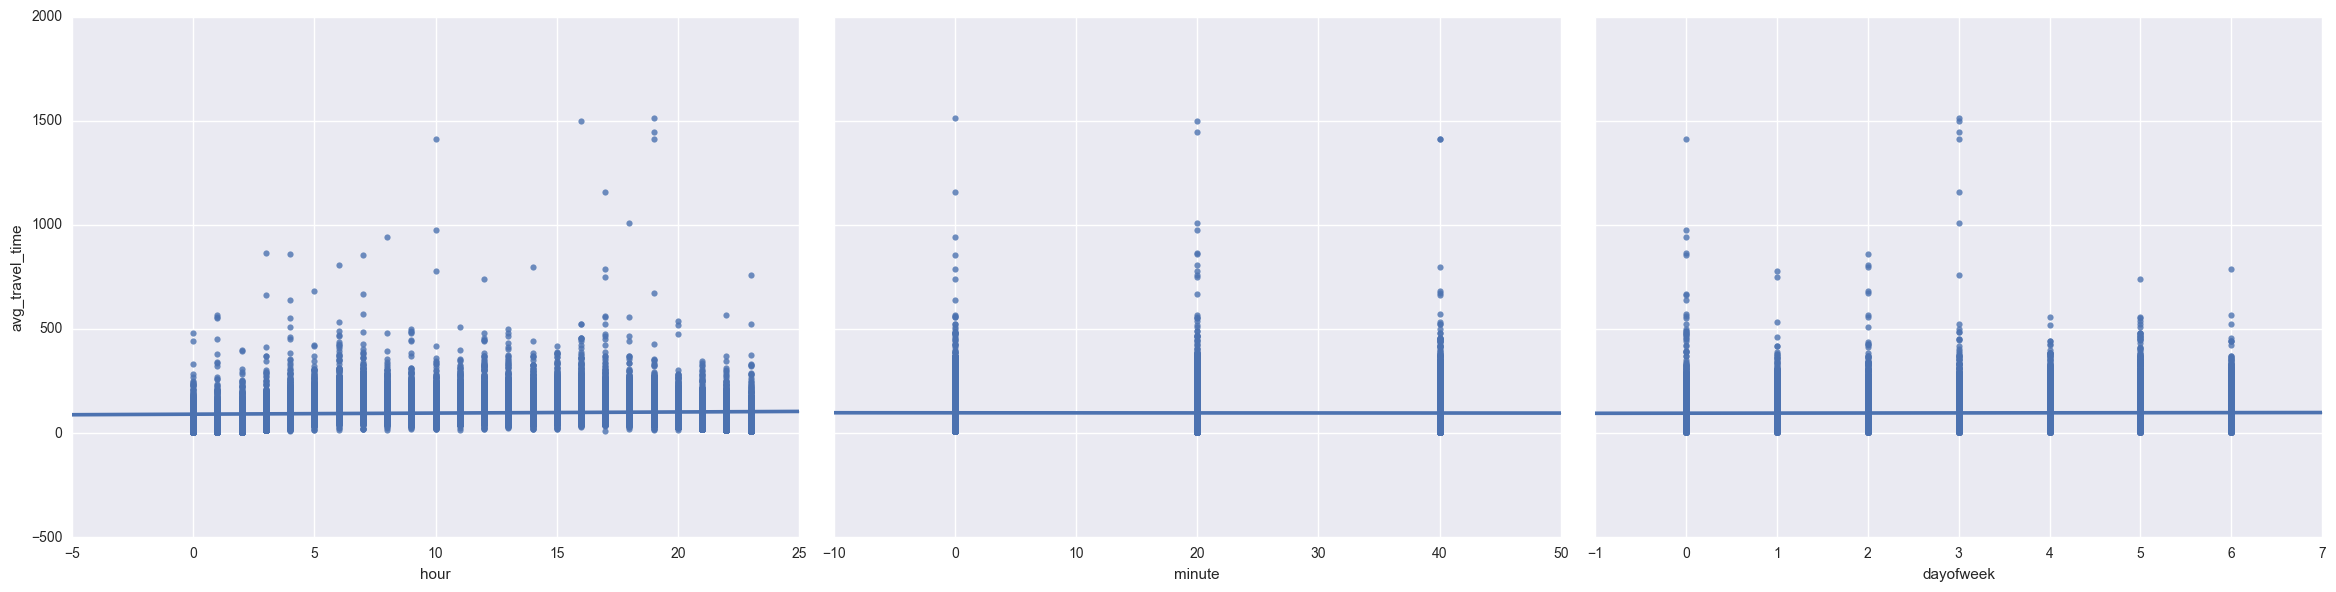

In [57]:
sns.pairplot(df, x_vars=feature_cols, y_vars=['avg_travel_time'], size=6, aspect=1.3, kind='reg')

# split train and test

In [43]:
# not working!?!?!

import src.misc.split_train_valid as split
#training, validation, testing = split.split_dataset(x_df, 0.8, 0)

In [32]:
from sklearn.model_selection import train_test_split

feature_cols = ['hour', 'minute', 'dayofweek']

x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['avg_travel_time'], test_size=0.2, random_state=42)

# k-fold cross validation
# 13 weeks

# train model

In [36]:
from sklearn import linear_model

# Linear
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)
print(list(zip(feature_cols, linreg.coef_)))

90.4505541547
[ 0.5378391  -0.01347068  0.37377118]
[('hour', 0.53783909947222686), ('minute', -0.013470675331621032), ('dayofweek', 0.37377118090272132)]


# evaluate

In [40]:
y_pred = linreg.predict(x_test)
y_pred

array([  91.52524444,   99.57974395,   99.32440534, ...,  100.22194072,
        103.77711115,   98.02494898])

In [39]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))

4054.16945765


# All_together try different splits

In [47]:
results = []

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['avg_travel_time'], test_size=0.2)
    # Linear
    linreg = linear_model.LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    
    rmse = metrics.mean_squared_error(y_test, y_pred)
    
    res = [linreg.intercept_, linreg.coef_, rmse]
    results.append(res)

pd.DataFrame(results, columns=['intercept_', 'coef_', 'rmse'])

,intercept_,coef_,rmse
0,89.900135,"[0.553162415068, -0.0109416038171, 0.449450448...",4293.120405
1,90.406761,"[0.544382755867, -0.0430806912813, 0.534094441...",3753.681408
2,90.564282,"[0.537184781523, -0.0250889884854, 0.430037729...",4126.072963
3,90.796235,"[0.508025303115, -0.0101932285518, 0.296625425...",3893.368448
4,90.548492,"[0.558682850336, -0.0364820538643, 0.378925613...",3913.769467
5,89.772504,"[0.544020384939, -0.0123248005422, 0.529592140...",4002.785057
6,90.489136,"[0.560705266648, -0.0279377386041, 0.46599922408]",3636.617045
7,90.522800,"[0.52685064344, -0.0234596604812, 0.455429051707]",3745.868425
8,90.779581,"[0.499510477393, -0.0129419222283, 0.371548692...",4643.868031
9,90.035448,"[0.523470833998, -0.00737534488841, 0.43789263...",3878.608227


# Use K-fold Cross Validation

In [71]:
# using k=13 -> 13 weeks
from sklearn.model_selection import cross_val_score
for i in range(2,42):
    linreg = linear_model.LinearRegression()
    scores = cross_val_score(linreg, df[feature_cols], df['avg_travel_time'], cv=i)
    print(i, scores.mean())

2 -0.0136550778135
3 -0.00451698571477
4 -0.0172182283394
5 -0.0115886937688
6 -0.0128614033172
7 -0.0192007563099
8 -0.0125629832363
9 -0.0205520178453
10 -0.0121324560931
11 -0.0206496967275
12 -0.0178696265426
13 -0.0161331753932
14 -0.0187423881844
15 -0.015802700029
16 -0.0214825039539
17 -0.0194334498526
18 -0.0209669981238
19 -0.0190266464005
20 -0.0232651993636
21 -0.0192234925935
22 -0.0214332542837
23 -0.0222366779215
24 -0.0209497753024
25 -0.0231583992857
26 -0.0206221891042
27 -0.0256733750917
28 -0.0205605843793
29 -0.0240059211337
30 -0.0204546432879
31 -0.0231928180191
32 -0.0221112534617
33 -0.024614620124
34 -0.0258157286425
35 -0.0231218872723
36 -0.0294662828878
37 -0.0266213378535
38 -0.0258434982667
39 -0.0256765723216
40 -0.0265690909442
41 -0.0245131508336
